In [ ]:
!pip install kaggle
import kaggle

# Set your Kaggle API credentials
kaggle.api.authenticate(api_key='cbddd2fdfce59e21280f99532f35b1c4')

# Download the Titanic dataset
kaggle.api.dataset_download_files('heptapod/titanic', path='.', unzip=True)

ERROR: Operation cancelled by user


OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.

In [ ]:
import kaggle

# Set your Kaggle API credentials
kaggle.api.authenticate(api_key='cbddd2fdfce59e21280f99532f35b1c4')

# Download the Titanic dataset
kaggle.api.dataset_download_files('heptapod/titanic', path='.', unzip=True)

OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.

In [6]:
import os
import shutil
import stat
# Step 1: Ensure the .kaggle directory exists
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
# Step 2: Move kaggle.json to the .kaggle directory if it exists in the current directory
if os.path.exists('kaggle.json'):
    shutil.move('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))
# Step 3: Set the permissions
kaggle_json_path = os.path.expanduser('~/.kaggle/kaggle.json')
os.chmod(kaggle_json_path, stat.S_IRUSR | stat.S_IWUSR)
# Step 4: Install Kaggle API (if not already installed)
os.system('pip install kaggle')
# Step 5: Download the Iris dataset
os.system('kaggle datasets download -d heptapod/titanic')
# Step 6: Unzip the data
shutil.unpack_archive('titanic.zip', 'titanic_data')
# Step 7: Load the dataset into a DataFrame
import pandas as pd
df = pd.read_csv('titanic_data/titanic.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [8]:
# Step 6: Unzip the data
shutil.unpack_archive('titanic.zip', 'titanic_data')
# Step 7: Load the dataset into a DataFrame
import pandas as pd
df = pd.read_csv('titanic_data/train_and_test2.csv')
print(df.head())

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify duplicates are removed
print(df.duplicated().sum())

0


In [10]:
# Remove irrelevant columns (e.g., 'Cabin' and 'Ticket')
df = df.drop(['Cabin', 'Ticket'], axis=1)

KeyError: "['Cabin', 'Ticket'] not found in axis"

In [11]:
df["Fare"].mean()

33.28108563789152

In [12]:
df["Fare"].median()

14.4542

In [13]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

In [14]:
print(Q1)
print(Q3 )

7.8958
31.275


In [15]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_data = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [17]:
titanic_data["Fare"].mean()

17.958991915641477

In [18]:
titanic_data["Fare"].median()

13.0

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
titanic_data['Age_normalized'] = scaler.fit_transform(titanic_data[['Age']])

<ipython-input-19-61f7095e3a33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['Age_normalized'] = scaler.fit_transform(titanic_data[['Age']])


In [20]:
titanic_data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived,Age_normalized
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,0,0.273456
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,1,0.323563
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,1,0,0,2.0,0,0,1,0.436302
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,0,0.436302
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,3,0,0,1.0,0,0,0,0.348616


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic_data['Age_standardized'] = scaler.fit_transform(titanic_data[['Age']])
titanic_data.head()

<ipython-input-21-5c9e7750a017>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['Age_standardized'] = scaler.fit_transform(titanic_data[['Age']])


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived,Age_normalized,Age_standardized
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,3,0,0,2.0,0,0,0,0.273456,-0.533814
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,3,0,0,2.0,0,0,1,0.323563,-0.209338
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,1,0,0,2.0,0,0,1,0.436302,0.520734
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,3,0,0,2.0,0,0,0,0.436302,0.520734
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,3,0,0,1.0,0,0,0,0.348616,-0.047100


In [26]:
from sklearn.decomposition import PCA

#This line creates an instance of the PCA class with the parameter n_components set to 2. It specifies that we want to reduce the dimensionality of the data to 2 principal components. In other words, the data will be projected into a 2D space.
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(titanic_data)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


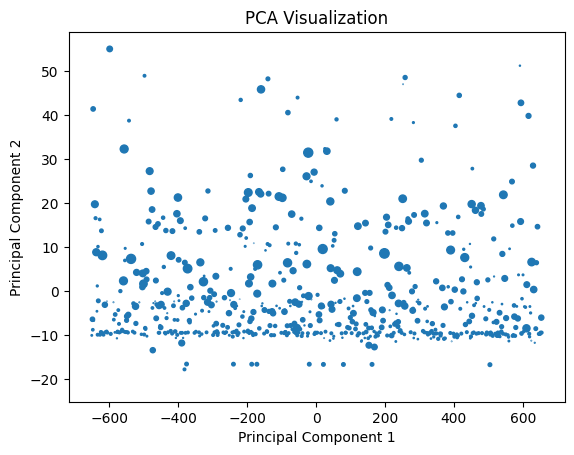

In [27]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the Titanic dataset (for demonstration purposes, we'll use random data)
np.random.seed(0)
titanic_data = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 100),
    'Feature2': np.random.normal(1, 2, 100),
    'Feature3': np.random.normal(2, 3, 100),
    'Feature4': np.random.normal(3, 4, 100)
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data)

# Create an instance of the PCA class with n_components set to 3
pca = PCA(n_components=3)

# Fit and transform the data
reduced_data = pca.fit_transform(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Cumulative explained variance: {np.cumsum(explained_variance)}')


Explained variance by each component: [0.30067501 0.26835587 0.23258962]
Cumulative explained variance: [0.30067501 0.56903088 0.8016205 ]


In [29]:
# Get the PCA components (eigenvectors)
loading_scores = pd.DataFrame(pca.components_, columns=titanic_data.columns)
print(f'Loading scores for each principal component:\n{loading_scores}')


Loading scores for each principal component:
   Feature1  Feature2  Feature3  Feature4
0  0.385633  0.548420  0.583020  0.458923
1  0.700879  0.246833 -0.190892 -0.641406
2 -0.243792  0.696384 -0.646512  0.194004


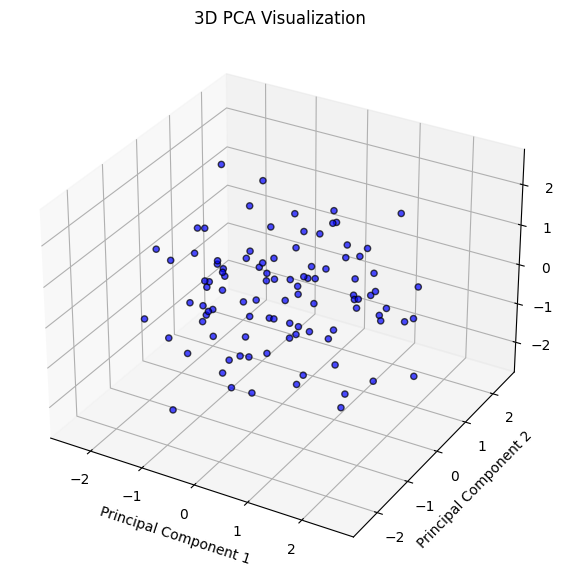

In [30]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the reduced data
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c='blue', edgecolor='k', alpha=0.7)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')

plt.show()


In [1]:
import pandas as pd

# Create the DataFrame
data = {
    'Fruit': ['Apple', 'Banana', 'Grape', 'Apple', 'Banana'],
    'Color': ['Red', 'Yellow', 'Green', 'Green', 'Red'],
    'Weight': [150, 120, 50, 160, 130]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
    Fruit   Color  Weight
0   Apple     Red     150
1  Banana  Yellow     120
2   Grape   Green      50
3   Apple   Green     160
4  Banana     Red     130


In [2]:
# Perform one-hot encoding using pd.get_dummies
one_hot_encoded_df = pd.get_dummies(df, columns=['Fruit', 'Color'])
print("\nOne-Hot Encoded DataFrame:")
print(one_hot_encoded_df)



One-Hot Encoded DataFrame:
   Weight  Fruit_Apple  Fruit_Banana  Fruit_Grape  Color_Green  Color_Red  \
0     150         True         False        False        False       True   
1     120        False          True        False        False      False   
2      50        False         False         True         True      False   
3     160         True         False        False         True      False   
4     130        False          True        False        False       True   

   Color_Yellow  
0         False  
1          True  
2         False  
3         False  
4         False  


In [3]:
import pandas as pd

# Create the DataFrame
data = {
    'Response': ['Yes', 'No', 'Maybe', 'Yes', 'No']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
  Response
0      Yes
1       No
2    Maybe
3      Yes
4       No


In [4]:
# Create a mapping of categorical values to numerical values
mapping = {'No': 0, 'Yes': 1, 'Maybe': 2}

# Apply the mapping to the 'Response' column
df['Response_Numerical'] = df['Response'].map(mapping)
print("\nDataFrame with Numerical Response:")
print(df)



DataFrame with Numerical Response:
  Response  Response_Numerical
0      Yes                   1
1       No                   0
2    Maybe                   2
3      Yes                   1
4       No                   0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create the DataFrame
data = {
    'Response': ['Yes', 'No', 'Maybe', 'Yes', 'No']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'Response' column
one_hot_encoded_data = one_hot_encoder.fit_transform(df[['Response']])

# Create a DataFrame with the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(['Response']))

# Concatenate the original DataFrame and the one-hot encoded DataFrame
df = pd.concat([df, one_hot_encoded_df], axis=1)

print("\nDataFrame with One-Hot Encoded Response:")
print(df)


In [5]:
import numpy as np
from scipy.sparse import csr_matrix

# Create a dense matrix (for demonstration purposes)
dense_matrix = np.array([
    [0, 0, 3, 0, 4],
    [0, 0, 5, 7, 0],
    [0, 0, 0, 0, 0],
    [2, 0, 6, 0, 0]
])

print("Dense Matrix:")
print(dense_matrix)


Dense Matrix:
[[0 0 3 0 4]
 [0 0 5 7 0]
 [0 0 0 0 0]
 [2 0 6 0 0]]


In [6]:
# Convert the dense matrix to a sparse matrix (CSR format)
sparse_matrix = csr_matrix(dense_matrix)

print("\nSparse Matrix:")
print(sparse_matrix)



Sparse Matrix:
  (0, 2)	3
  (0, 4)	4
  (1, 2)	5
  (1, 3)	7
  (3, 0)	2
  (3, 2)	6


In [7]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'Age': [23, 45, 36, 54, 67, 12, 38, 27, 20, 52]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
      Name  Age
0    Alice   23
1      Bob   45
2  Charlie   36
3    David   54
4      Eva   67
5    Frank   12
6    Grace   38
7   Hannah   27
8      Ian   20
9     Jack   52


In [8]:
# Define the bins and labels
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']


In [10]:
# Create a new column 'AgeGroup' with the age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print("\nDataFrame with Age Groups:")
print(df)



DataFrame with Age Groups:
      Name  Age     AgeGroup
0    Alice   23  Young Adult
1      Bob   45        Adult
2  Charlie   36        Adult
3    David   54        Adult
4      Eva   67       Senior
5    Frank   12        Child
6    Grace   38        Adult
7   Hannah   27  Young Adult
8      Ian   20  Young Adult
9     Jack   52        Adult
